In [1]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

In [2]:
session.evaluate(wlexpr('Range[5]'))

PackedArray([1, 2, 3, 4, 5], dtype=int8)

In [5]:
a = session.evaluate(wlexpr("RandomVariate[NormalDistribution[1,2], 100]"))

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 1.,  0.,  0.,  3.,  8.,  3.,  4., 14., 11., 10., 13.,  8.,  7.,
         7.,  5.,  5.,  0.,  0.,  0.,  1.]),
 PackedArray([-4.55548334, -3.97143015, -3.38737696, -2.80332377,
              -2.21927058, -1.63521739, -1.05116421, -0.46711102,
               0.11694217,  0.70099536,  1.28504855,  1.86910174,
               2.45315493,  3.03720812,  3.62126131,  4.2053145 ,
               4.78936769,  5.37342088,  5.95747407,  6.54152726,
               7.12558045]),
 <BarContainer object of 20 artists>)

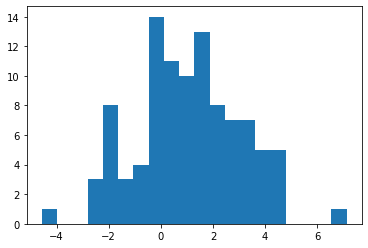

In [10]:
plt.hist(a, bins =20)

In [11]:
link = "https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-with-R-Third-Edition/master/Chapter03/wisc_bc_data.csv"

In [12]:
import pandas as pd

In [14]:
df = pd.read_csv(link)

In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [17]:
radius_mean = df["radius_mean"].values

In [21]:
session.evaluate(wl.FindDistribution(radius_mean))

MixtureDistribution[(0.6713659043517975, 0.3286340956482024), (NormalDistribution[12.599063220908489, 1.9263516545715778], NormalDistribution[17.723829079303044, 3.9915751664413555])]

In [22]:
a = ["radius_mean", "texture_mean", "area_mean"]

In [28]:
for i in a:
    val = df[i].values
    print("This distribution of i is: ")
    print(session.evaluate(wl.FindDistribution(val)))

This distribution of i is: 
MixtureDistribution[(0.6713659043517975, 0.3286340956482024), (NormalDistribution[12.599063220908489, 1.9263516545715778], NormalDistribution[17.723829079303044, 3.9915751664413555])]
This distribution of i is: 
LogNormalDistribution[2.941281688105509, 0.2383270114327388]
This distribution of i is: 
MixtureDistribution[(0.7241725565842367, 0.2758274434157632), (NormalDistribution[493.7743390532716, 149.2091804779232], LogNormalDistribution[6.965108784814423, 0.29009672792835844])]


In [31]:
dummy = session.evaluate(wlexpr("RandomVariate[MixtureDistribution[{0.6713659043517975, 0.3286340956482024}, {NormalDistribution[12.599063220908489, 1.9263516545715778], NormalDistribution[17.723829079303044, 3.9915751664413555]}], 100]"))

(array([ 1.,  7., 24., 27., 14., 10.,  6.,  4.,  4.,  3.]),
 PackedArray([ 6.85044845,  8.59518188, 10.33991532, 12.08464875,
              13.82938219, 15.57411562, 17.31884906, 19.06358249,
              20.80831593, 22.55304936, 24.2977828 ]),
 <BarContainer object of 10 artists>)

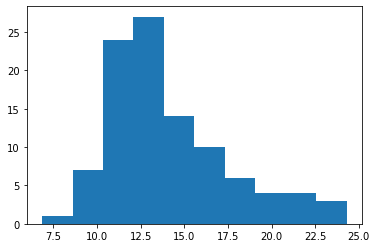

In [32]:
plt.hist(dummy)